Conjunto de datos de Comercio electronico
* fuente :fuente : UCI Machine Learning Repository
* Tamaño : 56.2 kb.
* entradas : 797
* Columnas :
 * 0   order_id      797 non-null    int64
 * 1   order_status  797 non-null    object
 * 2   order_source  797 non-null    object
 * 3   order_date    797 non-null    object
 * 4   category      797 non-null    object
 * 5   sku           797 non-null    object
 * 6   quantity      797 non-null    int64
 * 7   sales         797 non-null    int64
 * 8   city          797 non-null    object

In [ ]:
# Se cargan las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [1]:
# Se usa biblioteca google para poder usar archivos .
from google.colab import drive
# Se conecta colab con drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Se carga el conjunto de datos
path ="/content/drive/MyDrive/CLASE MACHINE LEARNING/DATA_CORES/dataset2.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,order_id,order_status,order_source,order_date,category,sku,quantity,sales,city
0,5447,Shipped,Whatsapp,04/01/2025,CK,Dng,1,1590,Karachi
1,14127,Shipped,Web,08/01/2025,CK,DIY,1,899,Karachi
2,14213,Shipped,Web,19/01/2025,CK,DIY,1,899,Karachi
3,14333,Shipped,Web,05/02/2025,CK,Simply9,1,990,Karachi
4,14397,Shipped,Web,16/02/2025,CK,Simply9,1,990,Karachi


#### Se da un vistazo general a las columnas por si hay alguna anomalia
#### Se distingue la columna categoria, por lo tanto se puede modelar usando modelos de clasificación.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      797 non-null    int64 
 1   order_status  797 non-null    object
 2   order_source  797 non-null    object
 3   order_date    797 non-null    object
 4   category      797 non-null    object
 5   sku           797 non-null    object
 6   quantity      797 non-null    int64 
 7   sales         797 non-null    int64 
 8   city          797 non-null    object
dtypes: int64(3), object(6)
memory usage: 56.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,797.0,16662.687578,50759.151028,5444.0,14231.0,14412.0,14640.0,1413666.0
quantity,797.0,1.058971,0.422704,1.0,1.0,1.0,1.0,8.0
sales,797.0,1925.685069,1093.164198,899.0,1390.0,1590.0,2190.0,13500.0


#### En la columna cantidad se ve que el min es 1 al igual que el percentil 25,50 y 75.

In [ ]:
df["category"].unique()

array(['CK', 'GfT', 'WD', 'HNS', 'Uncategorized'], dtype=object)

In [ ]:
df[df["category"] == 'Uncategorized']

,order_id,order_status,order_source,order_date,category,sku,quantity,sales,city
624,5460,Shipped,Whatsapp,25/02/2025,Uncategorized,Neon,1,3300,Rahim yar khan
753,14159,Cancelled,Web,12/01/2025,Uncategorized,Neon,1,3490,Karachi
754,14235,Cancelled,Web,21/01/2025,Uncategorized,Neon,1,3490,Multan
755,14370,Cancelled,Web,13/02/2025,Uncategorized,Neon,1,3490,Karachi
791,14434,Shipped,Web,23/02/2025,Uncategorized,Neon,2,6990,Rawalpindi


In [ ]:
df[df["sku"] == 'Neon']

,order_id,order_status,order_source,order_date,category,sku,quantity,sales,city
335,14164,Shipped,Web,13/01/2025,WD,Neon,1,3490,Lahore
624,5460,Shipped,Whatsapp,25/02/2025,Uncategorized,Neon,1,3300,Rahim yar khan
753,14159,Cancelled,Web,12/01/2025,Uncategorized,Neon,1,3490,Karachi
754,14235,Cancelled,Web,21/01/2025,Uncategorized,Neon,1,3490,Multan
755,14370,Cancelled,Web,13/02/2025,Uncategorized,Neon,1,3490,Karachi
791,14434,Shipped,Web,23/02/2025,Uncategorized,Neon,2,6990,Rawalpindi


In [ ]:
moda = df[(df["sku"] == 'Neon')]["category"].mode()[0]
df.loc[(df["sku"] == 'Neon') & (df["category"] == 'Uncategorized'), "category"] = moda

In [ ]:
df["category"].unique()

array(['CK', 'GfT', 'WD', 'HNS', 'Uncategorized'], dtype=object)

In [ ]:
df.loc[(df["sku"] == 'Neon') & (df["category"] == 'Uncategorized'), "category"] = df["category"].mode()[0]

In [ ]:
df["category"].unique()

array(['CK', 'GfT', 'WD', 'HNS'], dtype=object)

In [ ]:
df["category"].isna().sum()

np.int64(0)

In [ ]:
df["quantity"].isna().sum()

np.int64(0)

In [ ]:
df["order_source"].unique()

array(['Whatsapp', 'Web'], dtype=object)

In [ ]:
df["sku"].unique()

array(['Dng', 'DIY', 'Simply9', 'Eidi2p', 'Geo12', 'Simply12', 'Triangle',
       'Minim12', 'Gear12', '201-12', 'Swirl15', 'Circles', 'Crclr12',
       'Zen12', 'YY12', 'Geo15', 'BoldS15', 'pta', 'Simply15', '101-12',
       'Minim15', 'Gear15', 'Crclr15', 'PD', '001-9', 'Zen16', 'Silent12',
       'Rectangles', 'YY16', '201-15', '201-18', 'Silent18', '101-15',
       'Eidi5p', '001-12', '101-18', '103-18', '001-15', 'Minim9', 'Oval',
       'SunFlower', 'SunClouds', 'Cat15', 'PacMan16', 'Silent15',
       'Eidi4p', 'Neon', 'BF', 'Gear9', 'Birds', 'Strips', 'SunCloud',
       'OG16', 'Hexa', '18x11 matt', 'Eidi10p', 'Simply18', '15x9',
       'Hearts'], dtype=object)

In [ ]:
df["city"].value_counts()

,count
city,
Karachi,234
Lahore,171
Islamabad,69
Rawalpindi,44
Hyderabad,21
...,...
Larkana,1
kot addu,1
Pakpattan,1


In [ ]:
df["order_status"].unique()

array(['Shipped', 'Cancelled', 'Hold', 'Pickup', 'Booked'], dtype=object)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
792,False
793,False
794,False
795,False


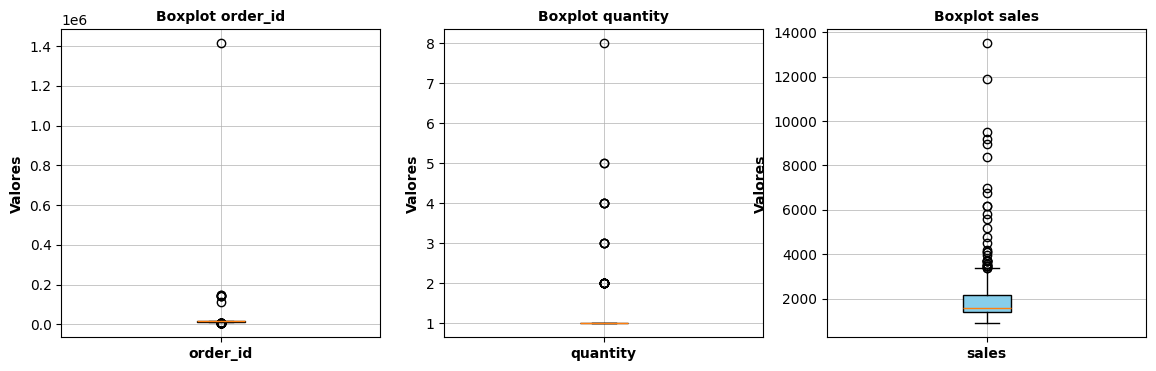

In [ ]:
# # Crear la figura y los subplots.
fig, axs = plt.subplots(1,3, figsize=(14, 4))
# Se deja el array en una dimension para no usar indices con dos dimensiones
axs = axs.flatten()
# Columnas numéricas a graficar
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
# Boxplot para las columnas numéricas
prop_caja = dict(facecolor='skyblue')
for i, col in enumerate(numeric_cols[:15]):
  axs[i].boxplot(df[col], patch_artist=True, boxprops=prop_caja)
  axs[i].set_title(f"Boxplot {col}", fontsize=10, fontweight='bold')
  axs[i].set_xticklabels([col], fontweight='bold')
  axs[i].set_ylabel("Valores", fontweight='bold')
  axs[i].grid(True, linewidth=0.5)



#### En la columna orde_id hay un caso aislado de dato atipico.
#### En la columnna sales se encuentran varios datos atipicos fuera del bigote superior
#### En la columna quantity sde distinguen 4 outlier. concentrandose la mayoria de los datos muy cerca del valor 1

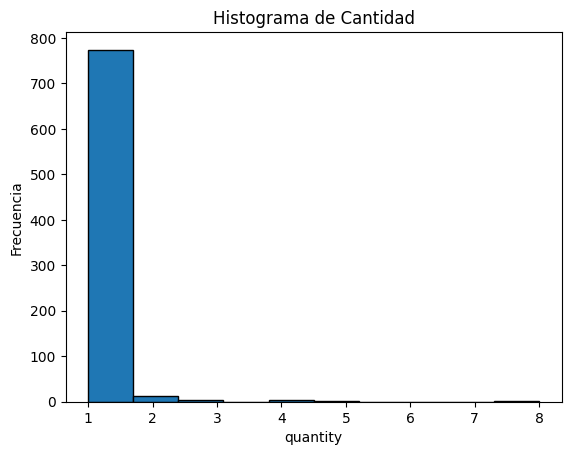

In [ ]:
# Se crea el histograma para visualizar los datos atipicos.
plt.hist(df["quantity"], bins=10, edgecolor='black')
plt.title('Histograma de Cantidad')
plt.xlabel('quantity')
plt.ylabel('Frecuencia')
plt.show()

### Se distingue que la cantidad se concentran en el rango de 1 a 2 con una frecuencia muy alta.

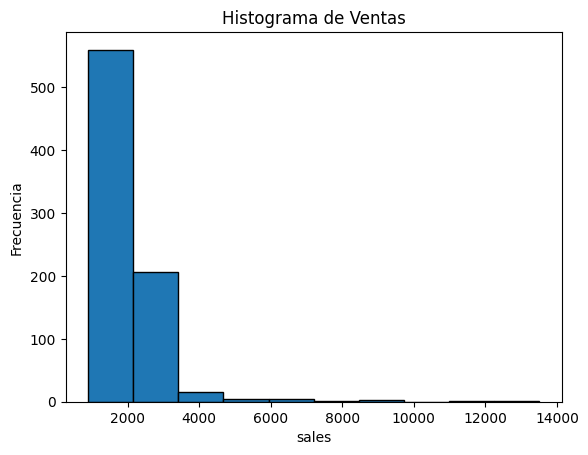

In [ ]:
# Se crea el histograma para visualizar los datos atipicos.
plt.hist(df["sales"], bins=10, edgecolor='black')
plt.title('Histograma de Ventas')
plt.xlabel('sales')
plt.ylabel('Frecuencia')
plt.show()

#### Se deduce del gráfico, las ventas se distribuyen en el rango de 0 a 400 con frecuencia muy altas sobre 500.